In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os

# By the below method we will get the working directory of the file

In [3]:
os.getcwd()

'D:\\Data Science\\September\\Statistical Methods For Decision Making'

In [4]:
df = pd.read_csv('Referral_Join_Prediction.csv')

In [5]:
df.head(5)

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
0,1,28,5.0,Delhi,106,89.0,72,87.0,83.0,Male,123.0,10.00,33.04,?,10.0,3,141,EL0,Yes
1,2,26,3.0,Pune,65,63.0,77,94.0,85.0,Male,83.0,6.09,27.39,20.87,10.0,10,80,ML0,Yes
2,3,23,2.0,Mumbai,45,92.0,85,84.0,72.0,Male,62.0,41.74,2.61,40.00,2.0,1,60,EL0,No
3,4,29,6.0,Bangalore,126,60.0,95,95.0,67.0,Male,146.0,31.30,9.13,23.48,9.0,3,142,ML0,Yes
4,5,26,3.0,Mumbai,65,92.0,70,80.0,92.0,Female,83.0,25.65,30.43,16.52,7.0,4,89,EL0,Yes


# As we can see that column 'referral_10_th_marks' and 'referral_graduation_marks' hve negative values 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
referral_id,499.0,250.000000,144.193157,1.00,125.50,250.00,374.50,499.00
referral_age,499.0,27.020040,2.811979,20.00,25.00,27.00,29.00,65.00
referral_exp_in_years,499.0,4.053307,2.609814,1.00,2.00,4.00,6.00,42.00
referral_current_salary,499.0,86.472946,52.566584,25.00,45.00,85.00,126.00,853.00
referral_10_th_marks,498.0,77.295181,11.128083,-1.00,68.00,78.00,87.00,103.00
referral_12th_marks,499.0,77.478958,10.932113,12.00,69.00,77.00,87.00,95.00
referral_graduation_marks,498.0,77.096386,10.812223,-1.00,68.00,77.00,86.00,104.00
referral_post_grad_marks,498.0,78.269076,10.478487,60.00,69.00,78.00,88.75,101.00
referral_expected_sal,497.0,108.692153,58.722281,40.00,62.00,103.00,143.00,870.00
referral_aptitude_verbal_score,489.0,21.840491,12.338425,0.43,11.74,20.87,32.61,43.48


# We can see that data type of column 'referral_aptitude_numerical_score' and 'referral_aptitude_reasoning_score' are object which is not correct it should be float. Let's correct these columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   referral_id                          499 non-null    int64  
 1   referral_age                         499 non-null    int64  
 2   referral_exp_in_years                499 non-null    float64
 3   referral_preferred_city              499 non-null    object 
 4   referral_current_salary              499 non-null    int64  
 5   referral_10_th_marks                 498 non-null    float64
 6   referral_12th_marks                  499 non-null    int64  
 7   referral_graduation_marks            498 non-null    float64
 8   referral_post_grad_marks             498 non-null    float64
 9   referral_gender                      499 non-null    object 
 10  referral_expected_sal                497 non-null    float64
 11  referral_aptitude_numerical_scor

# We can see that '?' is present along with 'nan' values. Let's correct it

In [8]:
df['referral_aptitude_numerical_score'].unique()

array(['10.00', '6.09', '41.74', '31.30', '25.65', '38.70', '30.43',
       '5.65', '18.70', '23.04', '27.39', '28.26', '32.61', '40.00',
       '24.78', '0.87', '27.83', '18.26', '20.87', '6.52', '21.74',
       '4.78', '26.96', '39.13', '3.04', '13.48', '33.91', '3.48',
       '15.65', '13.91', '38.26', '3.91', '28.70', '23.48', '10.43',
       '8.26', '39.57', '7.39', '30.87', '5.22', '12.61', '16.96',
       '34.35', '33.04', '10.87', '4.35', '35.65', '16.52', '20.43',
       '36.52', '40.43', '7.83', '6.96', '22.17', '34.78', '33.48',
       '43.48', '0.43', '17.39', '9.13', '29.57', '19.13', '17.83',
       '37.83', '36.09', '23.91', '36.96', '19.57', '31.74', '22.61',
       '12.17', '37.39', '14.78', '30.00', '11.74', '35.22', '2.61',
       '40.87', '42.61', '29.13', '?', '9.57', '43.04', '13.04', '25.22',
       '1.74', '15.22', '11.30', '32.17', '14.35', '20.00', nan, '2.17',
       '26.52', '26.09', '1.30', '8.70', '41.30', '16.09', '42.17',
       '24.35'], dtype=object)

In [9]:
df['referral_aptitude_reasoning_score'].unique()

array(['?', '20.87', '40.00', '23.48', '16.52', '32.61', '18.26', '2.50',
       '36.52', '3.04', '38.70', '26.52', '22.61', '14.35', '0.87',
       '13.04', '39.13', '34.35', '43.48', '20.43', '25.22', '37.83',
       '3.91', '28.26', '15.22', '15.65', '35.22', '17.39', '24.78',
       '33.04', '42.61', '31.74', '21.74', '6.09', '2.17', '8.70',
       '41.30', '26.09', '23.91', '27.83', '9.57', '10.43', '40.87',
       '12.17', '6.96', '33.48', '12.61', '42.17', '6.52', '2.61',
       '23.04', '20.00', '7.39', '4.35', '25.65', '31.30', '30.43',
       '5.22', '10.00', '37.39', '27.39', '0.23', '26.96', '34.78',
       '13.48', '19.13', '8.26', '24.35', '21.30', '0.67', '0.99',
       '29.57', '78.00', '36.96', '19.57', '36.09', '38.26', '28.70',
       '69.67', '33.91', '10.87', '0.43', '89.00', '18.70', '13.91', nan,
       '32.17', '7.83', '40.43', '16.09', '43.04', '30.00', '39.57',
       '29.13', '41.74', '11.74', '22.17', '16.96', '3.48', '35.65',
       '30.87', '4.78', '1.74',

# To replace the ? in the data we will use replace method and convert ? to np.NaN method - So that we are able to calculate the central tendency like mean, median, mode, IQR

In [10]:
df['referral_aptitude_numerical_score'].replace('?',np.NaN,inplace=True)
df['referral_aptitude_reasoning_score'].replace('?',np.NaN,inplace=True)

In [11]:
df['referral_aptitude_numerical_score'].unique()

array(['10.00', '6.09', '41.74', '31.30', '25.65', '38.70', '30.43',
       '5.65', '18.70', '23.04', '27.39', '28.26', '32.61', '40.00',
       '24.78', '0.87', '27.83', '18.26', '20.87', '6.52', '21.74',
       '4.78', '26.96', '39.13', '3.04', '13.48', '33.91', '3.48',
       '15.65', '13.91', '38.26', '3.91', '28.70', '23.48', '10.43',
       '8.26', '39.57', '7.39', '30.87', '5.22', '12.61', '16.96',
       '34.35', '33.04', '10.87', '4.35', '35.65', '16.52', '20.43',
       '36.52', '40.43', '7.83', '6.96', '22.17', '34.78', '33.48',
       '43.48', '0.43', '17.39', '9.13', '29.57', '19.13', '17.83',
       '37.83', '36.09', '23.91', '36.96', '19.57', '31.74', '22.61',
       '12.17', '37.39', '14.78', '30.00', '11.74', '35.22', '2.61',
       '40.87', '42.61', '29.13', nan, '9.57', '43.04', '13.04', '25.22',
       '1.74', '15.22', '11.30', '32.17', '14.35', '20.00', '2.17',
       '26.52', '26.09', '1.30', '8.70', '41.30', '16.09', '42.17',
       '24.35'], dtype=object)

In [12]:
df['referral_aptitude_reasoning_score'].unique()

array([nan, '20.87', '40.00', '23.48', '16.52', '32.61', '18.26', '2.50',
       '36.52', '3.04', '38.70', '26.52', '22.61', '14.35', '0.87',
       '13.04', '39.13', '34.35', '43.48', '20.43', '25.22', '37.83',
       '3.91', '28.26', '15.22', '15.65', '35.22', '17.39', '24.78',
       '33.04', '42.61', '31.74', '21.74', '6.09', '2.17', '8.70',
       '41.30', '26.09', '23.91', '27.83', '9.57', '10.43', '40.87',
       '12.17', '6.96', '33.48', '12.61', '42.17', '6.52', '2.61',
       '23.04', '20.00', '7.39', '4.35', '25.65', '31.30', '30.43',
       '5.22', '10.00', '37.39', '27.39', '0.23', '26.96', '34.78',
       '13.48', '19.13', '8.26', '24.35', '21.30', '0.67', '0.99',
       '29.57', '78.00', '36.96', '19.57', '36.09', '38.26', '28.70',
       '69.67', '33.91', '10.87', '0.43', '89.00', '18.70', '13.91',
       '32.17', '7.83', '40.43', '16.09', '43.04', '30.00', '39.57',
       '29.13', '41.74', '11.74', '22.17', '16.96', '3.48', '35.65',
       '30.87', '4.78', '1.74', '11.

# As we can see '?' has been replaced in both columns but still the data type is 'object'. We will convert that into float....Below is the method

In [13]:
df['referral_aptitude_numerical_score'] = df['referral_aptitude_numerical_score'].astype('float64')
df['referral_aptitude_reasoning_score'] = df['referral_aptitude_reasoning_score'].astype('float64')

# Now the data type is converted into float

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   referral_id                          499 non-null    int64  
 1   referral_age                         499 non-null    int64  
 2   referral_exp_in_years                499 non-null    float64
 3   referral_preferred_city              499 non-null    object 
 4   referral_current_salary              499 non-null    int64  
 5   referral_10_th_marks                 498 non-null    float64
 6   referral_12th_marks                  499 non-null    int64  
 7   referral_graduation_marks            498 non-null    float64
 8   referral_post_grad_marks             498 non-null    float64
 9   referral_gender                      499 non-null    object 
 10  referral_expected_sal                497 non-null    float64
 11  referral_aptitude_numerical_scor

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
referral_id,499.0,250.000000,144.193157,1.00,125.50,250.00,374.50,499.00
referral_age,499.0,27.020040,2.811979,20.00,25.00,27.00,29.00,65.00
referral_exp_in_years,499.0,4.053307,2.609814,1.00,2.00,4.00,6.00,42.00
referral_current_salary,499.0,86.472946,52.566584,25.00,45.00,85.00,126.00,853.00
referral_10_th_marks,498.0,77.295181,11.128083,-1.00,68.00,78.00,87.00,103.00
referral_12th_marks,499.0,77.478958,10.932113,12.00,69.00,77.00,87.00,95.00
referral_graduation_marks,498.0,77.096386,10.812223,-1.00,68.00,77.00,86.00,104.00
referral_post_grad_marks,498.0,78.269076,10.478487,60.00,69.00,78.00,88.75,101.00
referral_expected_sal,497.0,108.692153,58.722281,40.00,62.00,103.00,143.00,870.00
referral_aptitude_numerical_score,495.0,20.975737,12.557692,0.43,10.00,20.43,32.17,43.48


# Now we will treat anomalies - It means the domian corrections like marks cannot be negative

In [16]:
df[df['referral_10_th_marks'] < 35]

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
89,90,27,4.0,Bangalore,85,-1.0,81,93.0,86.0,Female,103.0,31.74,6.52,30.43,10.0,3,101,EL0,Yes


In [17]:
df[df['referral_graduation_marks'] < 35]

,referral_id,referral_age,referral_exp_in_years,referral_preferred_city,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_gender,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered,Emp_Salary_Grade,Joined
270,271,29,6.0,Bangalore,126,82.0,88,-1.0,64.0,Male,143.0,10.43,27.39,27.83,1.0,6,141,ML0,No


# Let's assume that 10th marks is similar to that of 12th marks and impute the value

# To impute the value there is a 'where' function in numpy - Similar to if conditon in excel - very interesting and important

In [18]:
df['referral_10_th_marks'] = np.where(df['referral_10_th_marks'] == -1 , df['referral_12th_marks'] , df['referral_10_th_marks'])

# Now we can see that 10th marks is equal to 12th marks

In [19]:
df.iloc[89]

referral_id                                   90
referral_age                                  27
referral_exp_in_years                        4.0
referral_preferred_city                Bangalore
referral_current_salary                       85
referral_10_th_marks                        81.0
referral_12th_marks                           81
referral_graduation_marks                   93.0
referral_post_grad_marks                    86.0
referral_gender                           Female
referral_expected_sal                      103.0
referral_aptitude_numerical_score          31.74
referral_aptitude_verbal_score              6.52
referral_aptitude_reasoning_score          30.43
referral_Management_Interview_score         10.0
referral_HR_Interview_score                    3
Salary offered                               101
Emp_Salary_Grade                             EL0
Joined                                       Yes
Name: 89, dtype: object

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
referral_id,499.0,250.000000,144.193157,1.00,125.50,250.00,374.50,499.00
referral_age,499.0,27.020040,2.811979,20.00,25.00,27.00,29.00,65.00
referral_exp_in_years,499.0,4.053307,2.609814,1.00,2.00,4.00,6.00,42.00
referral_current_salary,499.0,86.472946,52.566584,25.00,45.00,85.00,126.00,853.00
referral_10_th_marks,498.0,77.459839,10.559375,60.00,68.00,78.00,87.00,103.00
referral_12th_marks,499.0,77.478958,10.932113,12.00,69.00,77.00,87.00,95.00
referral_graduation_marks,498.0,77.096386,10.812223,-1.00,68.00,77.00,86.00,104.00
referral_post_grad_marks,498.0,78.269076,10.478487,60.00,69.00,78.00,88.75,101.00
referral_expected_sal,497.0,108.692153,58.722281,40.00,62.00,103.00,143.00,870.00
referral_aptitude_numerical_score,495.0,20.975737,12.557692,0.43,10.00,20.43,32.17,43.48


# We can see in column 'referral_graduation_marks' min is -1. Since the mean and median are similar we can replace the negative values by mean

In [21]:
df['referral_graduation_marks'].describe()

count    498.000000
mean      77.096386
std       10.812223
min       -1.000000
25%       68.000000
50%       77.000000
75%       86.000000
max      104.000000
Name: referral_graduation_marks, dtype: float64

In [22]:
df['referral_graduation_marks'].mean()

77.09638554216868

In [23]:
df['referral_graduation_marks'].replace(-1, df['referral_graduation_marks'].mean(), inplace=True)

# Now negative values have been replaced by mean

In [24]:
df['referral_graduation_marks'].describe()

count    498.000000
mean      77.253206
std       10.227796
min       60.000000
25%       68.000000
50%       77.000000
75%       86.000000
max      104.000000
Name: referral_graduation_marks, dtype: float64

In [25]:
df.iloc[270]

referral_id                                  271
referral_age                                  29
referral_exp_in_years                        6.0
referral_preferred_city                Bangalore
referral_current_salary                      126
referral_10_th_marks                        82.0
referral_12th_marks                           88
referral_graduation_marks              77.096386
referral_post_grad_marks                    64.0
referral_gender                             Male
referral_expected_sal                      143.0
referral_aptitude_numerical_score          10.43
referral_aptitude_verbal_score             27.39
referral_aptitude_reasoning_score          27.83
referral_Management_Interview_score          1.0
referral_HR_Interview_score                    6
Salary offered                               141
Emp_Salary_Grade                             ML0
Joined                                        No
Name: 270, dtype: object

# Now let's check the 4 categorial columns

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   referral_id                          499 non-null    int64  
 1   referral_age                         499 non-null    int64  
 2   referral_exp_in_years                499 non-null    float64
 3   referral_preferred_city              499 non-null    object 
 4   referral_current_salary              499 non-null    int64  
 5   referral_10_th_marks                 498 non-null    float64
 6   referral_12th_marks                  499 non-null    int64  
 7   referral_graduation_marks            498 non-null    float64
 8   referral_post_grad_marks             498 non-null    float64
 9   referral_gender                      499 non-null    object 
 10  referral_expected_sal                497 non-null    float64
 11  referral_aptitude_numerical_scor

In [27]:
df['referral_preferred_city'].unique()

array(['Delhi', 'Pune', 'Mumbai', 'Bangalore'], dtype=object)

In [28]:
df['referral_preferred_city'].value_counts()

Mumbai       232
Bangalore    142
Delhi         93
Pune          32
Name: referral_preferred_city, dtype: int64

In [29]:
df['referral_gender'].unique()

array(['Male', 'Female', '?'], dtype=object)

# Gender Column has a bad values as ?, we have to replace that

In [30]:
df['referral_gender'].value_counts()

Male      260
Female    238
?           1
Name: referral_gender, dtype: int64

In [31]:
df['Emp_Salary_Grade'].unique()

array(['EL0', 'ML0', 'EE0'], dtype=object)

In [32]:
df['Emp_Salary_Grade'].value_counts()

EL0    221
ML0    187
EE0     91
Name: Emp_Salary_Grade, dtype: int64

In [33]:
df['Joined'].unique()

array(['Yes', 'No'], dtype=object)

In [34]:
df['Joined'].value_counts()

No     261
Yes    238
Name: Joined, dtype: int64

# After checking all categorical columns only gender column has bad values as ?

# To impute categorical values we check mode

In [35]:
df['referral_gender'].value_counts()

Male      260
Female    238
?           1
Name: referral_gender, dtype: int64

In [36]:
df['referral_gender'].mode()

0    Male
Name: referral_gender, dtype: object

In [37]:
df['referral_gender'].replace('?',df['referral_gender'].mode()[0] , inplace=True)

In [38]:
df['referral_gender'].value_counts()

Male      261
Female    238
Name: referral_gender, dtype: int64

# Let's check for other missing values

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   referral_id                          499 non-null    int64  
 1   referral_age                         499 non-null    int64  
 2   referral_exp_in_years                499 non-null    float64
 3   referral_preferred_city              499 non-null    object 
 4   referral_current_salary              499 non-null    int64  
 5   referral_10_th_marks                 498 non-null    float64
 6   referral_12th_marks                  499 non-null    int64  
 7   referral_graduation_marks            498 non-null    float64
 8   referral_post_grad_marks             498 non-null    float64
 9   referral_gender                      499 non-null    object 
 10  referral_expected_sal                497 non-null    float64
 11  referral_aptitude_numerical_scor

In [40]:
df.isnull().sum()

referral_id                             0
referral_age                            0
referral_exp_in_years                   0
referral_preferred_city                 0
referral_current_salary                 0
referral_10_th_marks                    1
referral_12th_marks                     0
referral_graduation_marks               1
referral_post_grad_marks                1
referral_gender                         0
referral_expected_sal                   2
referral_aptitude_numerical_score       4
referral_aptitude_verbal_score         10
referral_aptitude_reasoning_score       8
referral_Management_Interview_score     1
referral_HR_Interview_score             0
Salary offered                          0
Emp_Salary_Grade                        0
Joined                                  0
dtype: int64

# Let's check for outliers in column 'referral_aptitude_verbal_score'

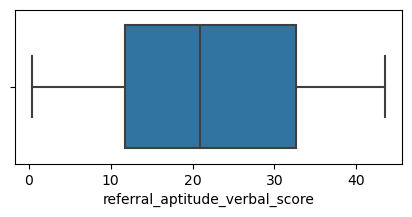

In [41]:
plt.figure(figsize=(5,2))
sns.boxplot(data=df,x='referral_aptitude_verbal_score');

# As we can see there is no outlier and the data is mostly symmetrical we can use mean to impute the missing values

In [42]:
df.referral_aptitude_verbal_score.fillna(df.referral_aptitude_verbal_score.mean(),inplace=True)

In [43]:
df.isnull().sum()

referral_id                            0
referral_age                           0
referral_exp_in_years                  0
referral_preferred_city                0
referral_current_salary                0
referral_10_th_marks                   1
referral_12th_marks                    0
referral_graduation_marks              1
referral_post_grad_marks               1
referral_gender                        0
referral_expected_sal                  2
referral_aptitude_numerical_score      4
referral_aptitude_verbal_score         0
referral_aptitude_reasoning_score      8
referral_Management_Interview_score    1
referral_HR_Interview_score            0
Salary offered                         0
Emp_Salary_Grade                       0
Joined                                 0
dtype: int64

# Now in order to impute other columns we will create data frames based on the column data type....Below is the code

In [44]:
df_num = df.select_dtypes(['float64' , 'int64'])
df_cat = df.select_dtypes(['object'])

In [45]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   referral_id                          499 non-null    int64  
 1   referral_age                         499 non-null    int64  
 2   referral_exp_in_years                499 non-null    float64
 3   referral_current_salary              499 non-null    int64  
 4   referral_10_th_marks                 498 non-null    float64
 5   referral_12th_marks                  499 non-null    int64  
 6   referral_graduation_marks            498 non-null    float64
 7   referral_post_grad_marks             498 non-null    float64
 8   referral_expected_sal                497 non-null    float64
 9   referral_aptitude_numerical_score    495 non-null    float64
 10  referral_aptitude_verbal_score       499 non-null    float64
 11  referral_aptitude_reasoning_scor

In [46]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   referral_preferred_city  499 non-null    object
 1   referral_gender          499 non-null    object
 2   Emp_Salary_Grade         499 non-null    object
 3   Joined                   499 non-null    object
dtypes: object(4)
memory usage: 15.7+ KB


# We will import library and impute all numerical values all together

In [47]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='median')

In [48]:
df_num = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)

In [49]:
df_num.isnull().sum()

referral_id                            0
referral_age                           0
referral_exp_in_years                  0
referral_current_salary                0
referral_10_th_marks                   0
referral_12th_marks                    0
referral_graduation_marks              0
referral_post_grad_marks               0
referral_expected_sal                  0
referral_aptitude_numerical_score      0
referral_aptitude_verbal_score         0
referral_aptitude_reasoning_score      0
referral_Management_Interview_score    0
referral_HR_Interview_score            0
Salary offered                         0
dtype: int64

# Now no null values in numerical data type columns

In [50]:
df_cat.isnull().sum()

referral_preferred_city    0
referral_gender            0
Emp_Salary_Grade           0
Joined                     0
dtype: int64

# Now numerical and categorical values have not null values we can concatenate it together

In [51]:
df_new = pd.concat([df_num,df_cat] , axis=1, join='inner')

In [52]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
referral_id,499.0,250.000000,144.193157,1.00,125.50,250.00,374.500,499.00
referral_age,499.0,27.020040,2.811979,20.00,25.00,27.00,29.000,65.00
referral_exp_in_years,499.0,4.053307,2.609814,1.00,2.00,4.00,6.000,42.00
referral_current_salary,499.0,86.472946,52.566584,25.00,45.00,85.00,126.000,853.00
referral_10_th_marks,499.0,77.460922,10.548795,60.00,68.00,78.00,87.000,103.00
referral_12th_marks,499.0,77.478958,10.932113,12.00,69.00,77.00,87.000,95.00
referral_graduation_marks,499.0,77.252698,10.217528,60.00,68.00,77.00,86.000,104.00
referral_post_grad_marks,499.0,78.268537,10.467968,60.00,69.00,78.00,88.500,101.00
referral_expected_sal,499.0,108.669339,58.605352,40.00,62.00,103.00,143.000,870.00
referral_aptitude_numerical_score,499.0,20.971363,12.507253,0.43,10.00,20.43,31.955,43.48


# We can also drop the misssing values if we want by function df = df.dropna()

# Now we will check the duplicates in rows there is a function for it.

In [53]:
dups = df_new.duplicated()

In [54]:
print("Duplicates are:" ,dups.sum())

Duplicates are: 0


# If there are duplicates we can drop them by function - df.drop_duplicates(inplace=True)

In [55]:
df_new.drop_duplicates(inplace=True)

In [56]:
df_new.shape

(499, 19)

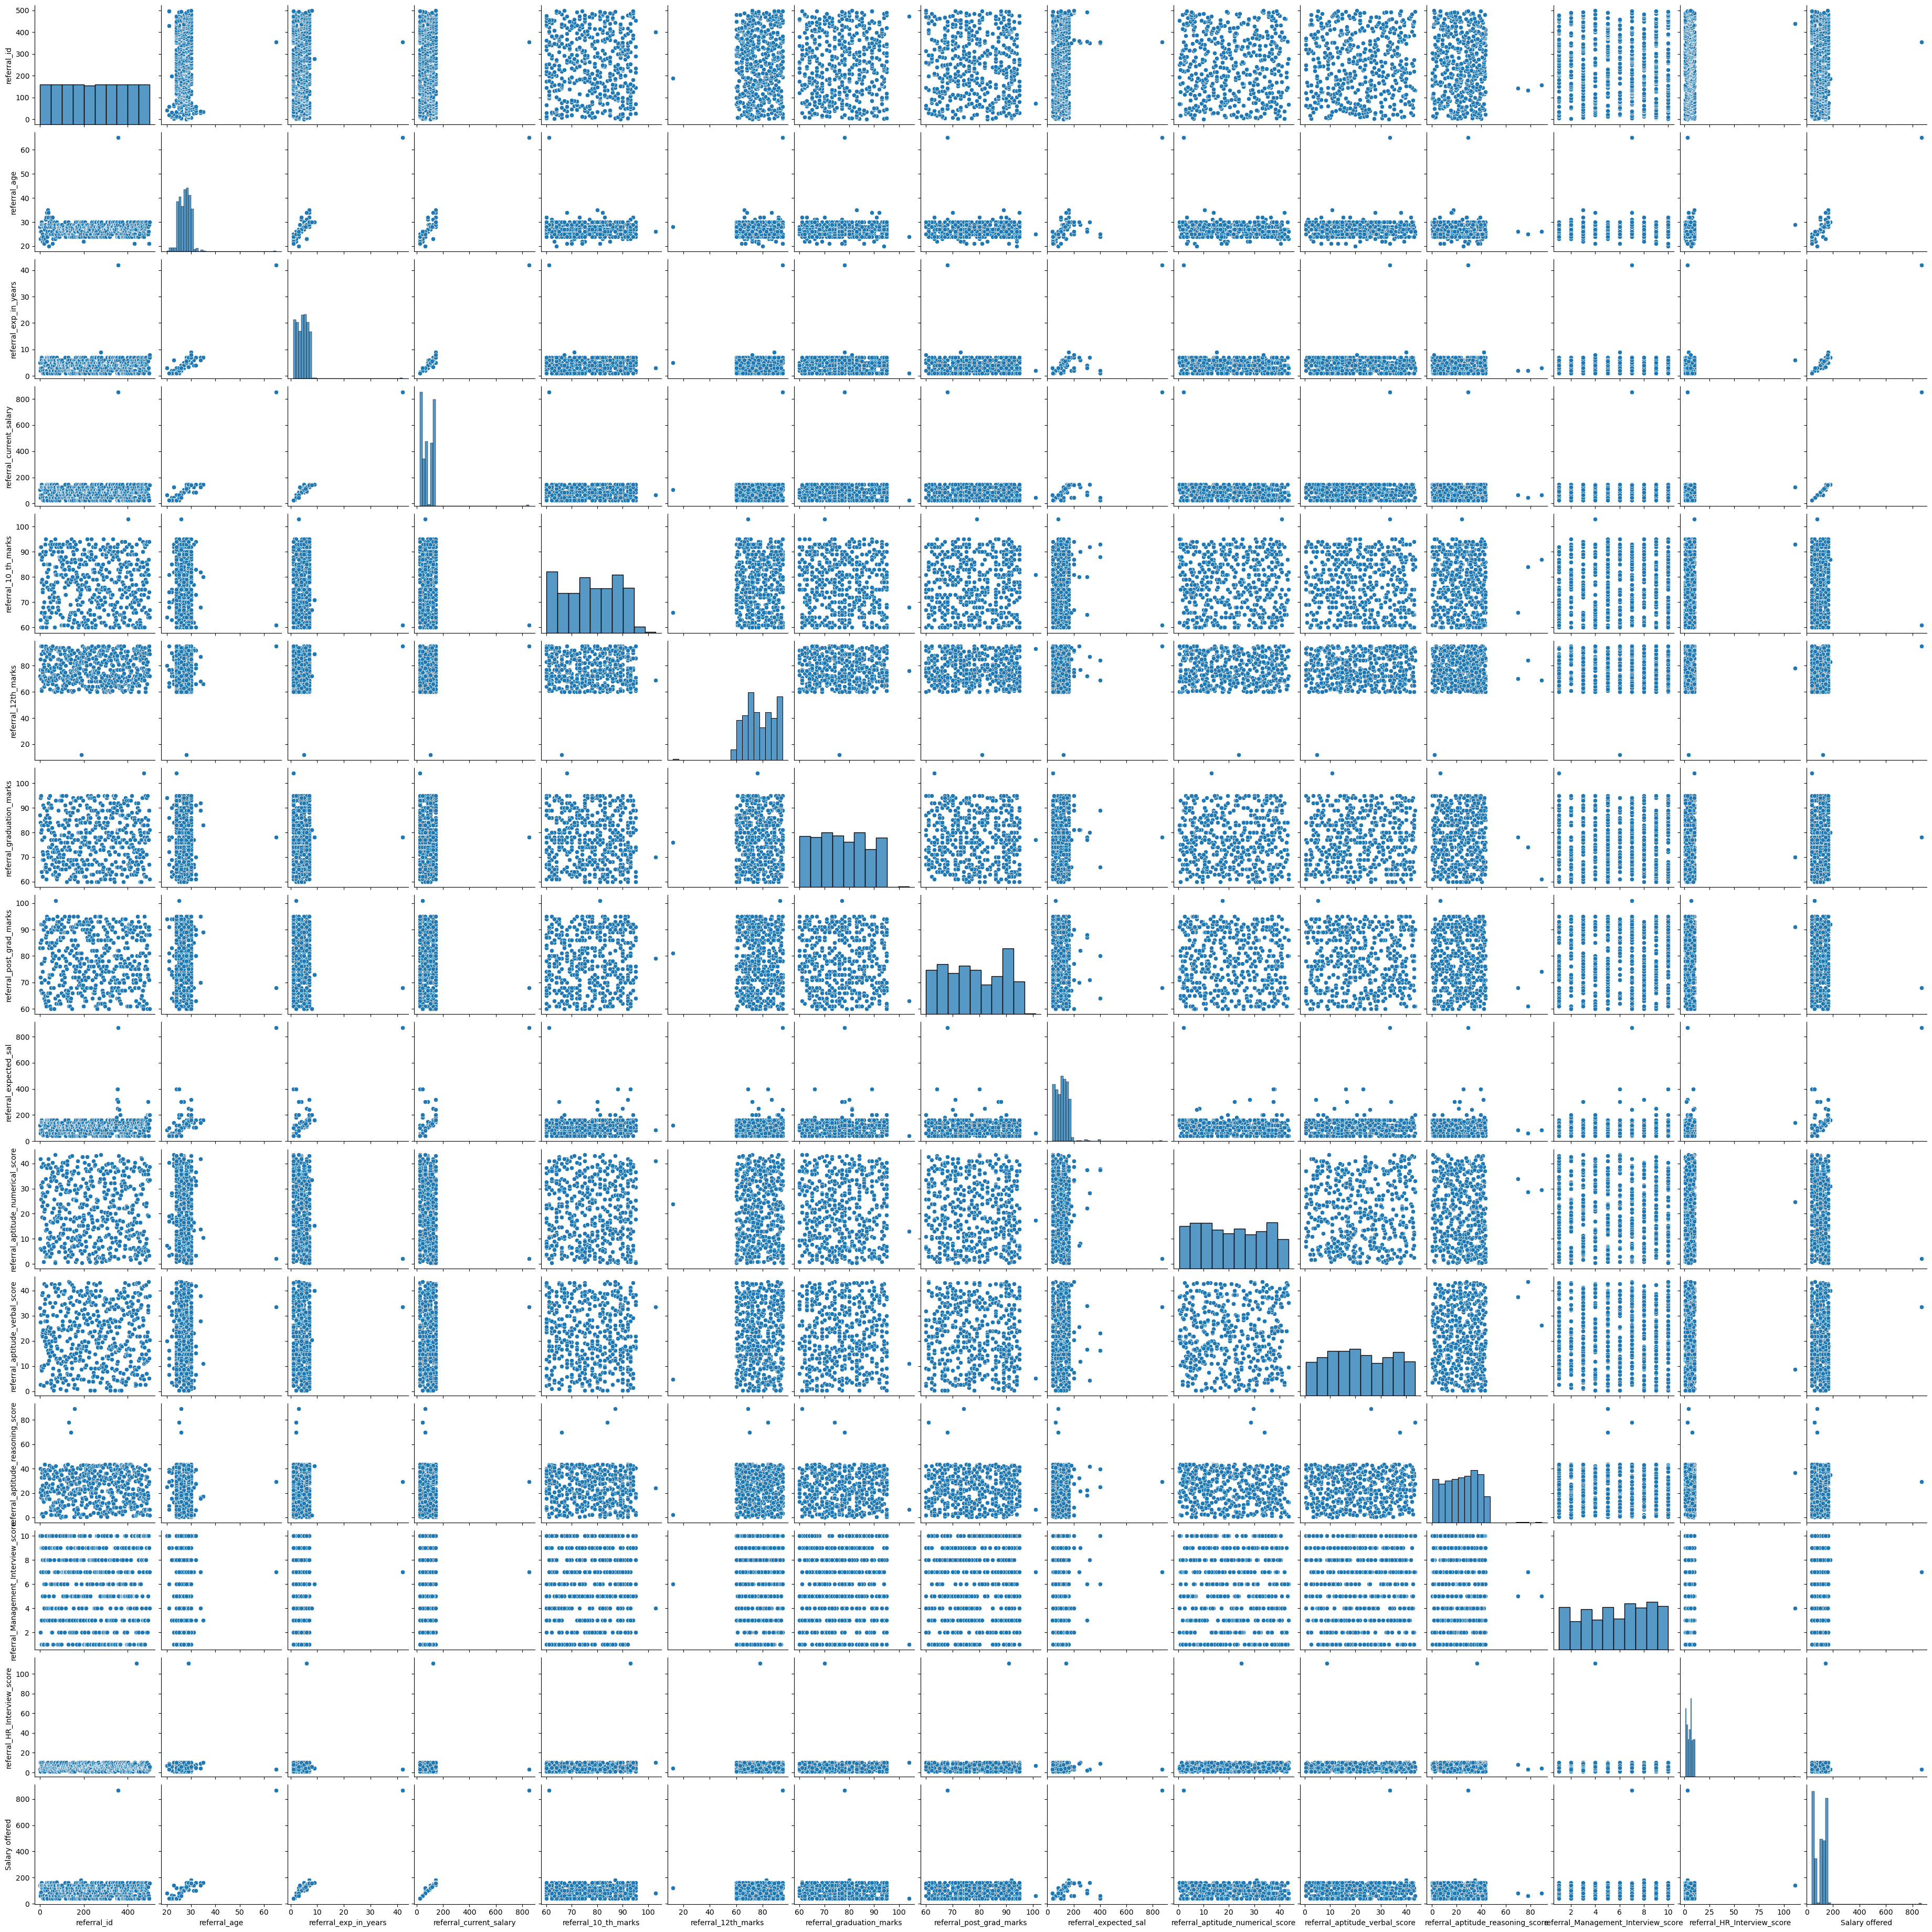

In [57]:
sns.pairplot(df)

C:\Users\ayush\AppData\Local\Temp\ipykernel_15456\3743095016.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".2f");


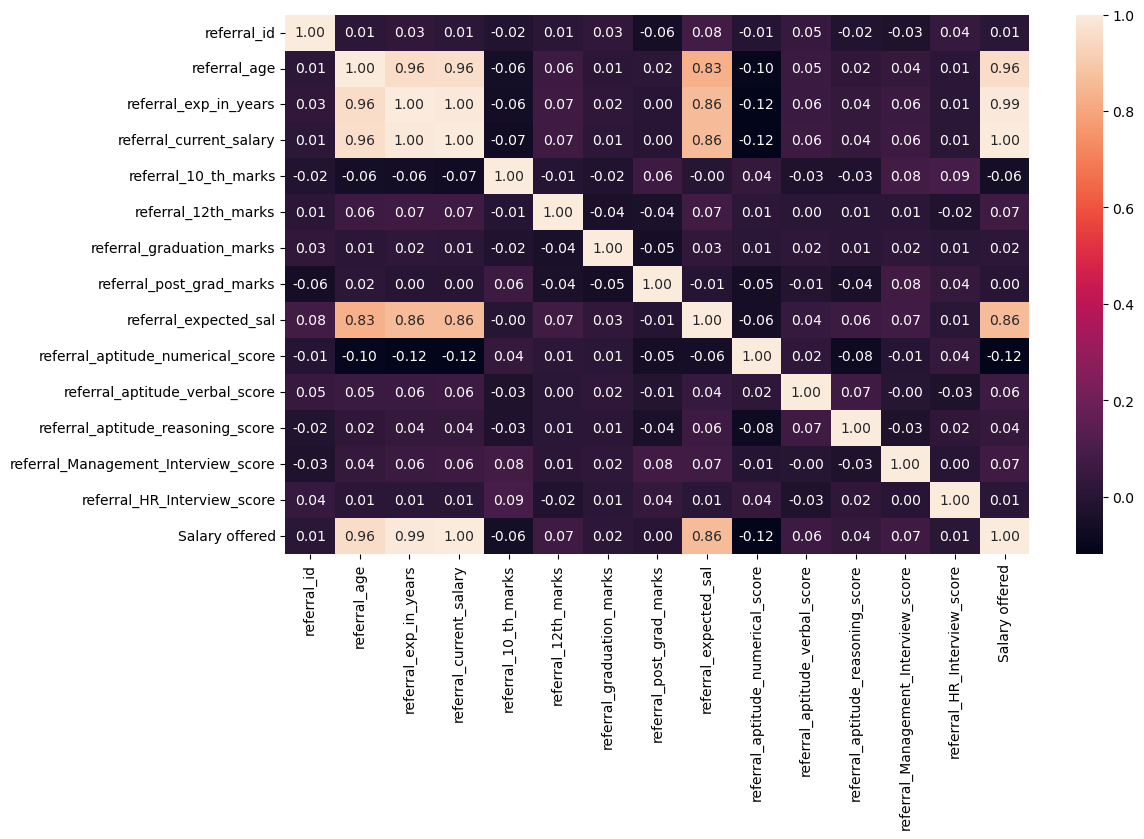

In [58]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,fmt=".2f");

In [59]:
df = df_new

In [60]:
df.columns

Index(['referral_id', 'referral_age', 'referral_exp_in_years',
       'referral_current_salary', 'referral_10_th_marks',
       'referral_12th_marks', 'referral_graduation_marks',
       'referral_post_grad_marks', 'referral_expected_sal',
       'referral_aptitude_numerical_score', 'referral_aptitude_verbal_score',
       'referral_aptitude_reasoning_score',
       'referral_Management_Interview_score', 'referral_HR_Interview_score',
       'Salary offered', 'referral_preferred_city', 'referral_gender',
       'Emp_Salary_Grade', 'Joined'],
      dtype='object')

In [61]:
df.describe()

,referral_id,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,250.000000,27.020040,4.053307,86.472946,77.460922,77.478958,77.252698,78.268537,108.669339,20.971363,21.840491,23.706713,5.733467,5.651303,102.006012
std,144.193157,2.811979,2.609814,52.566584,10.548795,10.932113,10.217528,10.467968,58.605352,12.507253,12.213917,13.391275,2.919795,5.500516,52.619704
min,1.000000,20.000000,1.000000,25.000000,60.000000,12.000000,60.000000,60.000000,40.000000,0.430000,0.430000,0.230000,1.000000,1.000000,40.000000
25%,125.500000,25.000000,2.000000,45.000000,68.000000,69.000000,68.000000,69.000000,62.000000,10.000000,11.740000,13.040000,3.000000,3.000000,60.000000
50%,250.000000,27.000000,4.000000,85.000000,78.000000,77.000000,77.000000,78.000000,103.000000,20.430000,21.740000,23.480000,6.000000,5.000000,101.000000
75%,374.500000,29.000000,6.000000,126.000000,87.000000,87.000000,86.000000,88.500000,143.000000,31.955000,32.610000,34.350000,8.000000,8.000000,141.000000
max,499.000000,65.000000,42.000000,853.000000,103.000000,95.000000,104.000000,101.000000,870.000000,43.480000,43.480000,89.000000,10.000000,111.000000,868.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   referral_id                          499 non-null    float64
 1   referral_age                         499 non-null    float64
 2   referral_exp_in_years                499 non-null    float64
 3   referral_current_salary              499 non-null    float64
 4   referral_10_th_marks                 499 non-null    float64
 5   referral_12th_marks                  499 non-null    float64
 6   referral_graduation_marks            499 non-null    float64
 7   referral_post_grad_marks             499 non-null    float64
 8   referral_expected_sal                499 non-null    float64
 9   referral_aptitude_numerical_score    499 non-null    float64
 10  referral_aptitude_verbal_score       499 non-null    float64
 11  referral_aptitude_reasoning_scor

# To do Scaling we will remove the columns which are irrelevant like 'referral_id'

In [63]:
df.drop(labels='referral_id' , axis=1, inplace=True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   referral_age                         499 non-null    float64
 1   referral_exp_in_years                499 non-null    float64
 2   referral_current_salary              499 non-null    float64
 3   referral_10_th_marks                 499 non-null    float64
 4   referral_12th_marks                  499 non-null    float64
 5   referral_graduation_marks            499 non-null    float64
 6   referral_post_grad_marks             499 non-null    float64
 7   referral_expected_sal                499 non-null    float64
 8   referral_aptitude_numerical_score    499 non-null    float64
 9   referral_aptitude_verbal_score       499 non-null    float64
 10  referral_aptitude_reasoning_score    499 non-null    float64
 11  referral_Management_Interview_sc

# The below method to create loop for columns names in terms of data type is very unique

In [65]:
cat = []
num = []
for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)
print("Below are the categorical values:")      
print(cat)
print()
print("Below are the numerical values:") 
print(num)

Below are the categorical values:
['referral_preferred_city', 'referral_gender', 'Emp_Salary_Grade', 'Joined']

Below are the numerical values:
['referral_age', 'referral_exp_in_years', 'referral_current_salary', 'referral_10_th_marks', 'referral_12th_marks', 'referral_graduation_marks', 'referral_post_grad_marks', 'referral_expected_sal', 'referral_aptitude_numerical_score', 'referral_aptitude_verbal_score', 'referral_aptitude_reasoning_score', 'referral_Management_Interview_score', 'referral_HR_Interview_score', 'Salary offered']


# There are 3 methods for sacling

## 1. Z-Score
## 2. StandardScaler
## 3. Min-Max

# Method -1 Very important - Remember to import the library

In [66]:
from scipy.stats import zscore
data_scaled = df[num].apply(zscore)

In [67]:
data_scaled.head()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
0,0.348844,0.363108,0.371846,1.094974,-0.501683,0.954936,0.452448,0.244774,-0.878080,0.917867,-0.016947,1.462710,-0.482494,0.741797
1,-0.363112,-0.404000,-0.408900,-1.372236,-0.043856,1.640721,0.643699,-0.438443,-1.191013,0.454815,-0.212046,1.462710,0.791391,-0.418628
2,-1.431047,-0.787553,-0.789752,1.379652,0.688667,0.661028,-0.599431,-0.797132,1.662194,-1.576054,1.217930,-1.279957,-0.846461,-0.799095
3,0.704823,0.746661,0.752697,-1.656914,1.604322,1.738690,-1.077558,0.637623,0.826641,-1.041701,-0.016947,1.119877,-0.482494,0.760820
4,-0.363112,-0.404000,-0.408900,1.379652,-0.684814,0.269151,1.313077,-0.438443,0.374449,0.703962,-0.537210,0.434210,-0.300510,-0.247418


In [68]:
df.describe()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,27.020040,4.053307,86.472946,77.460922,77.478958,77.252698,78.268537,108.669339,20.971363,21.840491,23.706713,5.733467,5.651303,102.006012
std,2.811979,2.609814,52.566584,10.548795,10.932113,10.217528,10.467968,58.605352,12.507253,12.213917,13.391275,2.919795,5.500516,52.619704
min,20.000000,1.000000,25.000000,60.000000,12.000000,60.000000,60.000000,40.000000,0.430000,0.430000,0.230000,1.000000,1.000000,40.000000
25%,25.000000,2.000000,45.000000,68.000000,69.000000,68.000000,69.000000,62.000000,10.000000,11.740000,13.040000,3.000000,3.000000,60.000000
50%,27.000000,4.000000,85.000000,78.000000,77.000000,77.000000,78.000000,103.000000,20.430000,21.740000,23.480000,6.000000,5.000000,101.000000
75%,29.000000,6.000000,126.000000,87.000000,87.000000,86.000000,88.500000,143.000000,31.955000,32.610000,34.350000,8.000000,8.000000,141.000000
max,65.000000,42.000000,853.000000,103.000000,95.000000,104.000000,101.000000,870.000000,43.480000,43.480000,89.000000,10.000000,111.000000,868.000000


In [69]:
data_scaled.describe()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
count,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02
mean,-6.407700e-17,6.585692e-17,-5.339750e-18,1.406134e-16,5.677934e-16,-7.190863e-16,-1.779917e-16,-9.967533e-17,2.518582e-16,-1.762118e-16,-2.207097e-16,1.352737e-16,1.245942e-17,1.050151e-16
std,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00
min,-2.498982e+00,-1.171107e+00,-1.170604e+00,-1.656914e+00,-5.995608e+00,-1.690234e+00,-1.746936e+00,-1.172901e+00,-1.644004e+00,-1.754718e+00,-1.754894e+00,-1.622791e+00,-8.464606e-01,-1.179563e+00
25%,-7.190903e-01,-7.875531e-01,-7.897520e-01,-8.977723e-01,-7.763793e-01,-9.064798e-01,-8.863075e-01,-7.971315e-01,-8.780803e-01,-8.277956e-01,-7.973413e-01,-9.371240e-01,-4.824935e-01,-7.990954e-01
50%,-7.133833e-03,-2.044594e-02,-2.804869e-02,5.115457e-02,-4.385598e-02,-2.475665e-02,-2.567896e-02,-9.683464e-02,-4.332734e-02,-8.235822e-03,-1.694692e-02,9.137646e-02,-1.185264e-01,-1.913773e-02
75%,7.048227e-01,7.466613e-01,7.526972e-01,9.051887e-01,8.717982e-01,8.569666e-01,9.783877e-01,5.863818e-01,8.790627e-01,8.826257e-01,7.955902e-01,7.770434e-01,4.274243e-01,7.417966e-01
max,1.352004e+01,1.455459e+01,1.459665e+01,2.423472e+00,1.604322e+00,2.620413e+00,2.173705e+00,1.300384e+01,1.801453e+00,1.773487e+00,4.880701e+00,1.462710e+00,1.917173e+01,1.457178e+01


<Figure size 500x500 with 0 Axes>

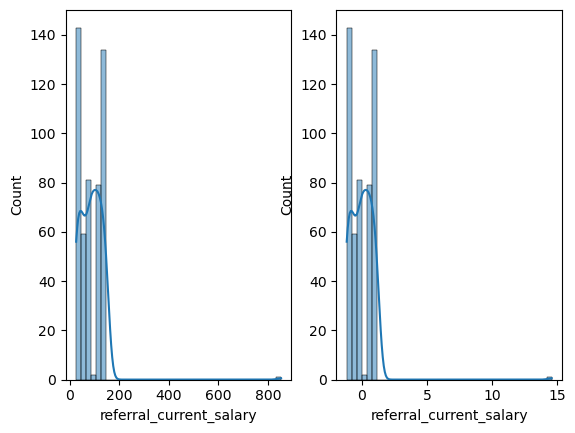

In [70]:
plt.figure(figsize=(5,5))
fig,axes = plt.subplots(nrows=1,ncols=2)
sns.histplot(data=df,x = df['referral_current_salary'] , kde=True , ax=axes[0])
sns.histplot(data=data_scaled,x = data_scaled['referral_current_salary'] , kde=True , ax=axes[1]);
plt.show()

# Method -2 - Using Standard Scaler - Here also we import StandardScaler from library sklearn

## The value that it returns is in the form of array so we convert the array into data frame

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df[num])
data_standard=scaler.transform(df[num])
data_standard=pd.DataFrame(data_standard, columns=df[num].columns)
data_standard.describe()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
count,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02
mean,-6.407700e-17,6.585692e-17,-5.339750e-18,1.406134e-16,5.677934e-16,-7.190863e-16,-1.779917e-16,-9.967533e-17,2.518582e-16,-1.762118e-16,-2.207097e-16,1.352737e-16,1.245942e-17,1.050151e-16
std,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00,1.001004e+00
min,-2.498982e+00,-1.171107e+00,-1.170604e+00,-1.656914e+00,-5.995608e+00,-1.690234e+00,-1.746936e+00,-1.172901e+00,-1.644004e+00,-1.754718e+00,-1.754894e+00,-1.622791e+00,-8.464606e-01,-1.179563e+00
25%,-7.190903e-01,-7.875531e-01,-7.897520e-01,-8.977723e-01,-7.763793e-01,-9.064798e-01,-8.863075e-01,-7.971315e-01,-8.780803e-01,-8.277956e-01,-7.973413e-01,-9.371240e-01,-4.824935e-01,-7.990954e-01
50%,-7.133833e-03,-2.044594e-02,-2.804869e-02,5.115457e-02,-4.385598e-02,-2.475665e-02,-2.567896e-02,-9.683464e-02,-4.332734e-02,-8.235822e-03,-1.694692e-02,9.137646e-02,-1.185264e-01,-1.913773e-02
75%,7.048227e-01,7.466613e-01,7.526972e-01,9.051887e-01,8.717982e-01,8.569666e-01,9.783877e-01,5.863818e-01,8.790627e-01,8.826257e-01,7.955902e-01,7.770434e-01,4.274243e-01,7.417966e-01
max,1.352004e+01,1.455459e+01,1.459665e+01,2.423472e+00,1.604322e+00,2.620413e+00,2.173705e+00,1.300384e+01,1.801453e+00,1.773487e+00,4.880701e+00,1.462710e+00,1.917173e+01,1.457178e+01


# Method - 3 - Using Min/Max method - Here we import MinMaxScaler from library sklearn

In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(df[num])
data_minmax = scaler.transform(df[num])
data_minmax = pd.DataFrame(data_minmax, columns = df[num].columns)
data_minmax.describe()

,referral_age,referral_exp_in_years,referral_current_salary,referral_10_th_marks,referral_12th_marks,referral_graduation_marks,referral_post_grad_marks,referral_expected_sal,referral_aptitude_numerical_score,referral_aptitude_verbal_score,referral_aptitude_reasoning_score,referral_Management_Interview_score,referral_HR_Interview_score,Salary offered
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,0.156001,0.074471,0.074243,0.406068,0.788903,0.392107,0.445574,0.082734,0.477151,0.497340,0.264467,0.525941,0.042285,0.074886
std,0.062488,0.063654,0.063486,0.245321,0.131712,0.232217,0.255316,0.070609,0.290529,0.283715,0.150854,0.324422,0.050005,0.063550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.024390,0.024155,0.186047,0.686747,0.181818,0.219512,0.026506,0.222300,0.262718,0.144306,0.222222,0.018182,0.024155
50%,0.155556,0.073171,0.072464,0.418605,0.783133,0.386364,0.439024,0.075904,0.464576,0.495006,0.261913,0.555556,0.036364,0.073671
75%,0.200000,0.121951,0.121981,0.627907,0.903614,0.590909,0.695122,0.124096,0.732288,0.747503,0.384364,0.777778,0.063636,0.121981
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# For Transformation

In [73]:
df.referral_current_salary.describe()

count    499.000000
mean      86.472946
std       52.566584
min       25.000000
25%       45.000000
50%       85.000000
75%      126.000000
max      853.000000
Name: referral_current_salary, dtype: float64

# As we can see the max values is 853, We will try to find how many outliers are present

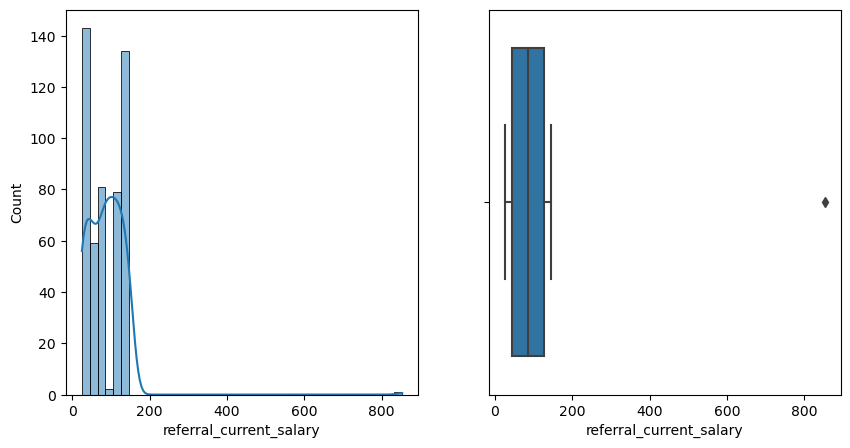

In [74]:
fig_dims = (10, 5) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims) 
sns.histplot(df.referral_current_salary, kde=True, ax=axs[0]) 
sns.boxplot(x= 'referral_current_salary', data=df, ax=axs[1]) ;

# Now we will calculate the skewness and kurtosis

In [75]:
print("The Skewness is: ",df['referral_current_salary'].skew())
print("The Kurtosis is: ",df['referral_current_salary'].kurt())

The Skewness is:  6.184346309755603
The Kurtosis is:  89.46603642396403


# Skewness gives the extent of symetrical distribution
# Kurtosis tells us about the sharpness of the peak

# For normal distribution skewness and kurtosis should be in between -1 to +1, let's try to reduce the skewness and kurtosis by log function


## Log Transformation

In [76]:
print(np.log(df['referral_current_salary']).skew())
print(np.log(df['referral_current_salary']).kurtosis())

-0.5366972326623899
-0.25722521778402907


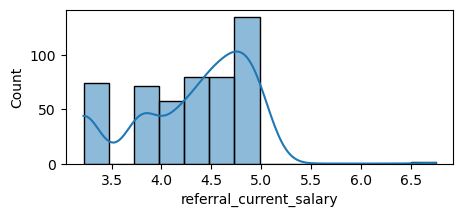

In [77]:
plt.figure(figsize=(5,2))
sns.histplot(data=df,x=np.log(df['referral_current_salary']) , kde=True);

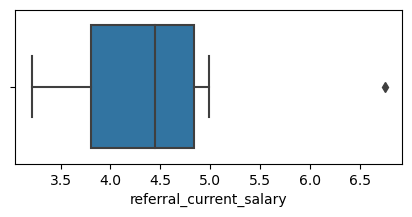

In [78]:
plt.figure(figsize=(5,2))
sns.boxplot(data=df,x=np.log(df['referral_current_salary']));

## Using Sqrt Transformation

In [79]:
print(np.sqrt(df['referral_current_salary']).skew())
print(np.sqrt(df['referral_current_salary']).kurtosis())

0.7524793474615112
7.32123129002615


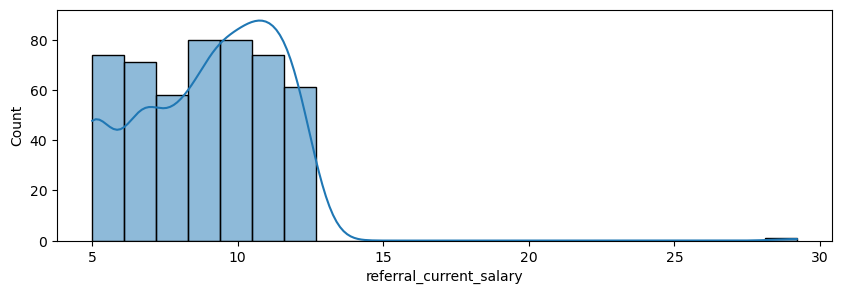

In [80]:
plt.figure(figsize=(10,3))
sns.histplot(data=df,x=np.sqrt(df['referral_current_salary']) , kde=True);

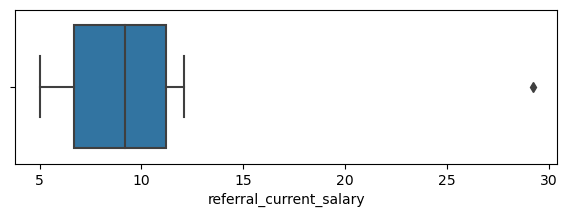

In [81]:
plt.figure(figsize=(7,2))
sns.boxplot(data=df,x=np.sqrt(df['referral_current_salary']));

# Usinf root of 10 for transformation

In [82]:
print((df['referral_current_salary'] ** 0.1).skew())
print((df['referral_current_salary'] ** 0.1).kurtosis())

-0.3950105143684113
0.04120887026425146


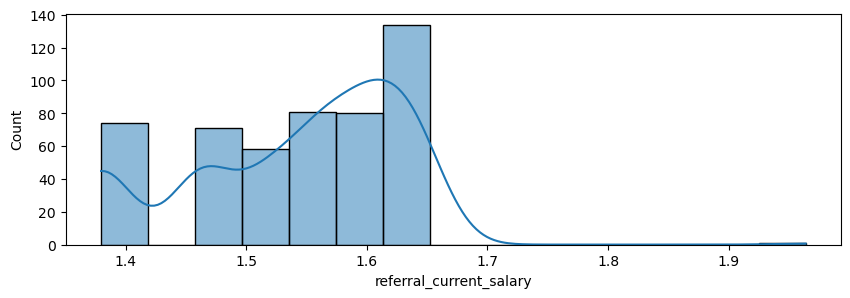

In [83]:
plt.figure(figsize=(10,3))
sns.histplot(data=df,x=(df['referral_current_salary'] ** 0.1), kde=True);

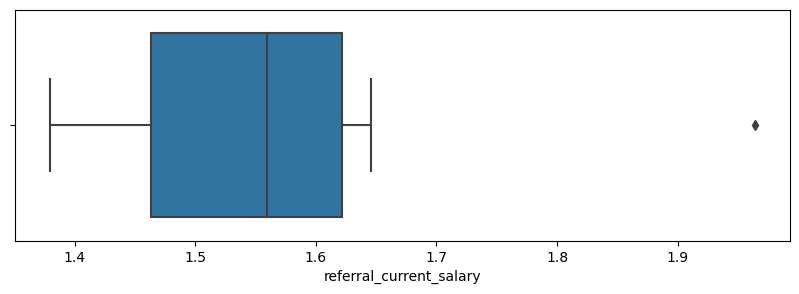

In [84]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df,x=(df['referral_current_salary'] ** 0.1));

# Outlier Treatement - We apply the rule of normalization and take values of Z-Score between 3 and -3. Anything beyond that is outlier.

# Method - 1 - Z-Score

In [85]:
# Take backup of 'referral_current_salary' field as 2 other fields to compare output from different methods
df['referral_current_salary1'] = df['referral_current_salary']
df['referral_current_salary2'] = df['referral_current_salary']

In [86]:
df.referral_current_salary.describe()

count    499.000000
mean      86.472946
std       52.566584
min       25.000000
25%       45.000000
50%       85.000000
75%      126.000000
max      853.000000
Name: referral_current_salary, dtype: float64

# Z-Score Formula = (X-X(Bar which is mean)/Standard Deviation

In [87]:
### Method I (Z Score)
df['referral_current_salary_zscore'] = ( df.referral_current_salary - df.referral_current_salary.mean() ) / df.referral_current_salary.std()
df['referral_current_salary_zscore'].describe()

count    4.990000e+02
mean     8.899583e-18
std      1.000000e+00
min     -1.169430e+00
25%     -7.889603e-01
50%     -2.802057e-02
75%      7.519426e-01
max      1.458202e+01
Name: referral_current_salary_zscore, dtype: float64

In [88]:
df[cat]

,referral_preferred_city,referral_gender,Emp_Salary_Grade,Joined
0,Delhi,Male,EL0,Yes
1,Pune,Male,ML0,Yes
2,Mumbai,Male,EL0,No
3,Bangalore,Male,ML0,Yes
4,Mumbai,Female,EL0,Yes
...,...,...,...,...
494,Pune,Male,EL0,Yes
495,Mumbai,Female,EL0,Yes
496,Mumbai,Male,EL0,Yes
497,Mumbai,Female,EL0,Yes
